In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
df = pd.read_excel("../../Data/Iris.xls")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
features = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']
X = df.loc[:, features].values

In [6]:
y = df.loc[:, ['iris']].values

In [7]:
# Scaler
x = StandardScaler().fit_transform(X)

In [8]:
pd.DataFrame(data=x, columns=features).head(3)

,sepallength,sepalwidth,petallength,petalwidth
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977


In [9]:
pca = PCA(n_components=2)

In [10]:
principalComponents = pca.fit_transform(X)

In [11]:
principalDf = pd.DataFrame(data=principalComponents,
                           columns = ['Principal_Component_1', 'Principal_Component_2'])

In [12]:
principalDf.head(5)

,Principal_Component_1,Principal_Component_2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925


In [13]:
df[['iris']].head()

,iris
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [14]:
finalDF = pd.concat([principalDf, df[['iris']]], axis=1)
finalDF.head()

,Principal_Component_1,Principal_Component_2,iris
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa


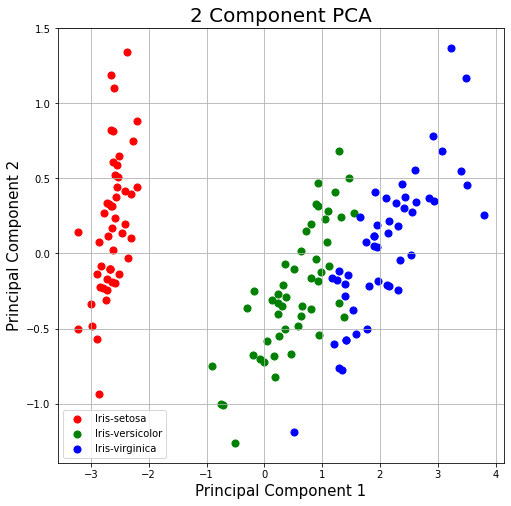

In [15]:
fig = plt.figure(figsize= (8, 8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Principal Component 1", fontsize = 15)
ax.set_ylabel("Principal Component 2", fontsize = 15)
ax.set_title("2 Component PCA", fontsize = 20)

targets = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
colors = ["r", "g", "b"]
for target, color in zip(targets, colors):
  indicesToKeep = finalDF["iris"] == target
  ax.scatter(finalDF.loc[indicesToKeep, "Principal_Component_1"],
             finalDF.loc[indicesToKeep, "Principal_Component_2"],
             c=color, s=50)
ax.legend(targets)
ax.grid()

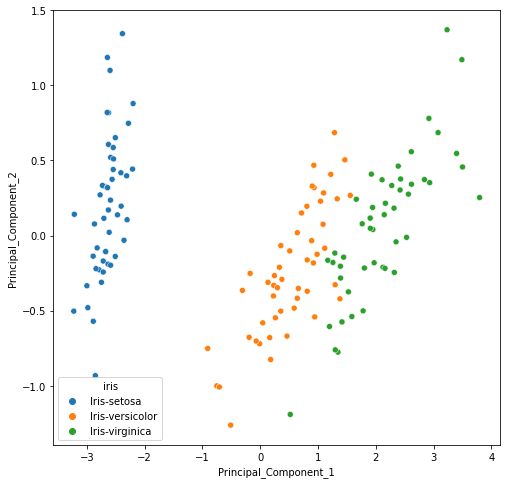

In [16]:
plt.figure(figsize= (8, 8))
sns.scatterplot(data=finalDF, x='Principal_Component_1', y='Principal_Component_2', hue='iris')
plt.show()

In [17]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])